<a href="https://colab.research.google.com/github/natbugreal/datascience/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

generally speaking, like many things in life, we like to opt for the sipmle and effective outlet -- this is also true in datascience! BUT...It is beneficial to use polynomial models because they typically work well when the data is like more complex or exhibits are more complex relationship (like when they have more than one fluctuation rather than just being a straightfoward linear connection.) But when using these its important to be cognizant of the potential overfitting that is common.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

Polynomial elements work better when they have alot of realtionships to deal with - this means that you should probably stay away from them if youre working with a simple dataset, this can also be said about linear datasets. STAY AWAY!

**Task3**:

What's the point of using b splines?

Using b splines allows us to have the best of the Polynomials with less of the tedious effects (like the overfitting) these can also be used when dealing with more relationships and bigger datasets.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

I THINK a Gaussian Process is like a way to model uncertain functions by treating them like an uncertain collection of smooth curves, where each curve has some randomness but is shaped by patterns of relatedness.
like kind of like gestalt psychology where things are percieved as a whole instead of the bits and pieces that they are actually displaying

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt


In [1]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-91ij5x3z
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-91ij5x3z
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev17+g0caf0962-py3-none-any.whl size=1260150 sha256=88d1ae13f2cbb9868645859402fd1882941db4be2da899164127719ad8c47315
  Stored in directory: /tmp/pip-ephem-wheel-cache-7d42k127/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.5 MB/s eta 0:00:00
   ━

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


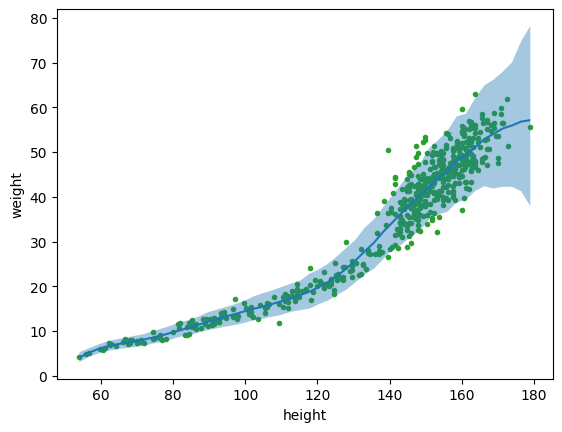

In [4]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

num_knots = 6
knots = np.linspace(howell.height.min(), howell.height.max(), num_knots+2)[1:-1]

#distributional model
formula_howell = bmb.Formula(
    "weight ~ bs(height, degree=3, knots=knots)",
    "sigma ~ height"
)

model_spline = bmb.Model(formula_howell, howell, family="gaussian")
idata_spline = model_spline.fit()

bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

One thing I learned about Gaussian Processes (GPs) from the article is that they can be used to model and account for both errors in the measurements (like uncertainty in the CO2 levels) and errors in the timing of those measurements (like uncertainty in the exact date when the ice core data was collected), which is critical when dealing with noisy or imprecise data like this.

Wait i originally read the task wrong and just did something i learned which i kind of hilarious because like duh nat it has to be datascience related but im just gonna leave it in so my hard work doesnt go to nothing:  One thing I learned from the article is that ice core data, like CO2 measurements, is less accurate than direct atmospheric measurements when theyre compared to those from Mauna Loa, due to the gradual process of CO2 diffusion in ice and the averaging effect of air bubbles trapped in the ice over several years. This makes the ice core data less precise in reflecting the exact CO2 levels at any given moment.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite graph is the one that like shows the posterior predictions of CO2 levels over time, which has a shaded area that has a clear representaton the uncertainty of the predictions. This graph is my favorite because it visually demonstrates how a Gaussian Process can capture the underlying trend of CO2 levels over centuries, while also showing the uncertainty in the predictions. it does a good job at handling uncertainty and make predictions even when the data is noisy, like the ice core data.